In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
img_width, img_height = 150, 150

In [3]:
# Path to the main directory
train_data_dir = '/content/drive/MyDrive/google collllab/Rock Paper Scissor Dataset/train'
test_data_dir='/content/drive/MyDrive/google collllab/Rock Paper Scissor Dataset/test'

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator


In [8]:
datagen=ImageDataGenerator(rescale=1. /255,validation_split=0.2)

In [9]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='categorical'
    )

validation_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='categorical'
    )


Found 2040 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [10]:
#CNN MODEL:

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(img_width,img_height,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(3, activation='softmax'))


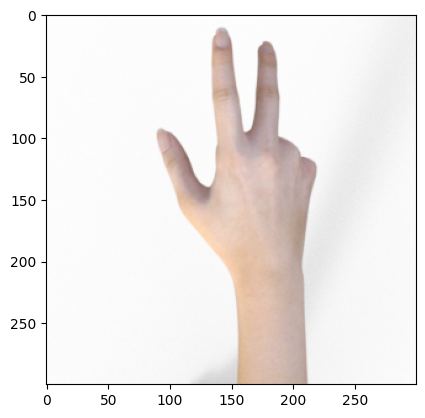

In [11]:
import matplotlib.pyplot as plt
import os

def single_image(img_path):
  if os.path.isfile(img_path):
    img=plt.imread(img_path)
    plt.imshow(img)
    plt.show()

  else:
    print("not displayed")

single_image('/content/drive/MyDrive/google collllab/Rock Paper Scissor Dataset/train/scissors/scissors01-001.png')

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/5
31/31 [==============================] - 500s 16s/step - loss: 1.0837 - accuracy: 0.6528 - val_loss: 1.0086 - val_accuracy: 0.5719
Epoch 2/5
31/31 [==============================] - 41s 1s/step - loss: 0.0858 - accuracy: 0.9823 - val_loss: 1.1422 - val_accuracy: 0.5437
Epoch 3/5
31/31 [==============================] - 40s 1s/step - loss: 0.0074 - accuracy: 0.9990 - val_loss: 1.3409 - val_accuracy: 0.5594
Epoch 4/5
31/31 [==============================] - 39s 1s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.7053 - val_accuracy: 0.5594
Epoch 5/5
31/31 [==============================] - 54s 2s/step - loss: 5.8820e-04 - accuracy: 1.0000 - val_loss: 1.9470 - val_accuracy: 0.5500


In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Test Accuracy:", accuracy)

6/6 [==============================] - 5s 681ms/step - loss: 1.8605 - accuracy: 0.5565
Test Accuracy: 0.5564516186714172


In [17]:
print(f"Final validation loss: {history.history['val_loss'][-1]}")

Final validation loss: 1.9470479488372803


In [18]:
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]}")

Final validation accuracy: 0.550000011920929


In [20]:
import numpy as np
from keras.preprocessing import image

# Function to predict a single image
def predict_single_image(model, image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    classes = ['rock', 'paper', 'scissors']
    print(f"Prediction: {classes[predicted_class]} - Raw output: {prediction[0]}")

# Predict single image
predict_single_image(model, '/content/drive/MyDrive/google collllab/Rock Paper Scissor Dataset/train/scissors/scissors01-001.png')


1/1 [==============================] - 0s 109ms/step
Prediction: scissors - Raw output: [4.1178003e-04 3.1393682e-04 9.9927431e-01]


6/6 [==============================] - 4s 552ms/step


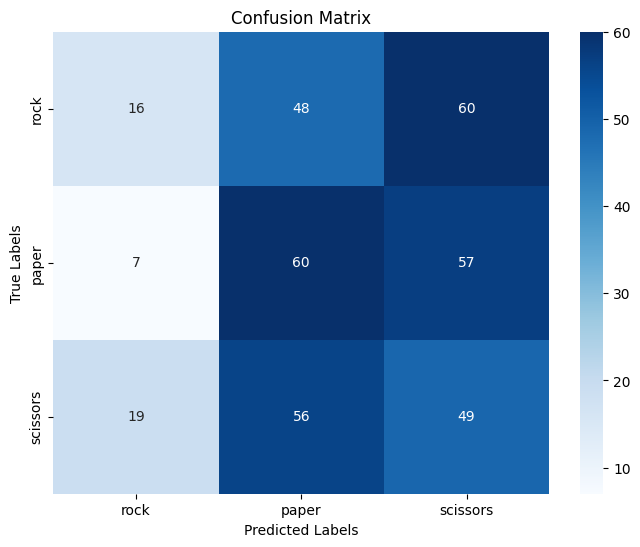

In [21]:
def get_predictions(model, generator):
    y_true = generator.classes
    y_pred = np.argmax(model.predict(generator), axis=-1)
    return y_true, y_pred

# Get predictions for the validation set
y_true, y_pred = get_predictions(model, validation_generator)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['rock', 'paper', 'scissors'], yticklabels=['rock', 'paper', 'scissors'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()